## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [1]:
## 
"""
Your code here (optional)
確認硬體資源
"""

'\nYour code here (optional)\n確認硬體資源\n'

In [2]:
import os
import keras

# 請嘗試設定 GPU：os.environ
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [3]:
train, test = keras.datasets.cifar10.load_data()

In [4]:
## 資料前處理
"""
Your code here
"""
from sklearn.preprocessing import MinMaxScaler
def preproc_x(x, flatten=True):
    minmax = MinMaxScaler()
    x = x.reshape(x.shape[0], 32*32*3)
    x = minmax.fit_transform(x)
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y   

In [5]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

C:\Users\xu3g4\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\xu3g4\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [6]:
"""Code Here
建立你的神經網路
"""
def build_mlp(input_shape, output_units=10, num_neurons=[128, 128, 256, 256, 512, 512, 1024]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 128)               393344    
_________________________________________________________________
hidden_layer2 (Dense)        (None, 128)               16512     
_________________________________________________________________
hidden_layer3 (Dense)        (None, 256)               33024     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 256)               65792     
_________________________________________________________________
hidden_layer5 (Dense)        (None, 512)               131584    
_________________________________________________________________
hidden_layer6 (Dense)        (None, 512)               262656    
__________

In [7]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [8]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [9]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 7s 146us/step - loss: 1.9252 - acc: 0.2892 - val_loss: 1.7710 - val_acc: 0.3604
Epoch 2/100
50000/50000 [==============================] - 5s 92us/step - loss: 1.7334 - acc: 0.3716 - val_loss: 1.7318 - val_acc: 0.3753
Epoch 3/100
50000/50000 [==============================] - 5s 93us/step - loss: 1.6491 - acc: 0.4057 - val_loss: 1.6156 - val_acc: 0.4239
Epoch 4/100
50000/50000 [==============================] - 5s 92us/step - loss: 1.5855 - acc: 0.4278 - val_loss: 1.5603 - val_acc: 0.4378
Epoch 5/100
50000/50000 [==============================] - 5s 92us/step - loss: 1.5360 - acc: 0.4461 - val_loss: 1.5338 - val_acc: 0.4588
Epoch 6/100
50000/50000 [==============================] - 5s 93us/step - loss: 1.4882 - acc: 0.4653 - val_loss: 1.4790 - val_acc: 0.4729
Epoch 7/100
50000/50000 [==============================] - 5s 92us/step - loss: 1.4633 - acc: 0.4751 - val_loss: 1.4986 -

50000/50000 [==============================] - 5s 92us/step - loss: 0.2176 - acc: 0.9235 - val_loss: 3.5412 - val_acc: 0.4732
Epoch 60/100
50000/50000 [==============================] - 5s 92us/step - loss: 0.1533 - acc: 0.9467 - val_loss: 3.8351 - val_acc: 0.4721
Epoch 61/100
50000/50000 [==============================] - 5s 92us/step - loss: 0.2073 - acc: 0.9289 - val_loss: 3.5171 - val_acc: 0.4624
Epoch 62/100
50000/50000 [==============================] - 5s 93us/step - loss: 0.1959 - acc: 0.9322 - val_loss: 3.5516 - val_acc: 0.4594
Epoch 63/100
50000/50000 [==============================] - 5s 92us/step - loss: 0.1999 - acc: 0.9307 - val_loss: 3.6840 - val_acc: 0.4619
Epoch 64/100
50000/50000 [==============================] - 5s 93us/step - loss: 0.1935 - acc: 0.9354 - val_loss: 3.6183 - val_acc: 0.4661
Epoch 65/100
50000/50000 [==============================] - 5s 93us/step - loss: 0.1757 - acc: 0.9397 - val_loss: 3.8406 - val_acc: 0.4726
Epoch 66/100
50000/50000 [==============

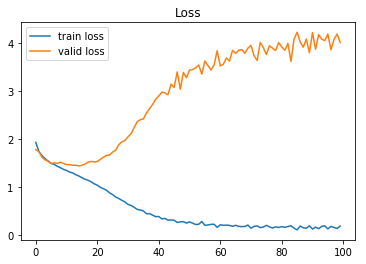

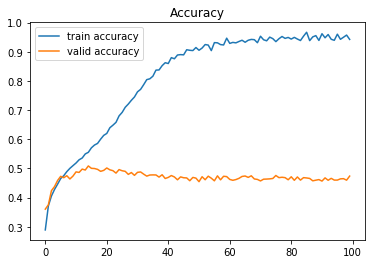

In [11]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()